In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)

In [2]:
# load full dataset
train = pd.read_csv("data/train.csv.zip")

In [6]:
# restrict to 0 and 1
train_01 = train[train.label.isin([0, 1])]

# build model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

y_01 = train_01["label"]
X_01 = train_01.drop("label", axis = 1)

X_01_train, X_01_test, y_01_train, y_01_test = train_test_split(X_01, y_01, random_state = 0)

classifier_01 = Pipeline(
    steps = [("preprocessor", StandardScaler()), ("classifier", SVC())]
)
classifier_01.fit(X_01_train, y_01_train)
classifier_01.score(X_01_test, y_01_test)

0.9918330308529946

<Figure size 432x288 with 0 Axes>

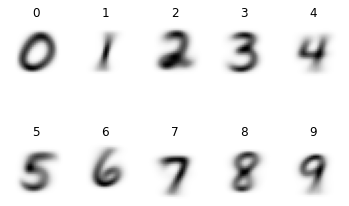

In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

train_mean = train.groupby("label").mean()

plt.figure()
_, axs = plt.subplots(2, 5)
for i in range(len(train_mean.index)):
    idx = train_mean.index[i]
    ax = axs[int(i/5), i%5]
    ax.imshow(train_mean.loc[idx].to_numpy().reshape((28, 28)), cmap = cm.Greys)
    ax.set_title(idx)
    ax.axis('off')
plt.show()

In [8]:
from skimage.metrics import structural_similarity as ssim

max_ssim = -float("inf")
max_ssim_pair = (None, None)
for i in train_mean.index:
    imi = train_mean.loc[i].to_numpy().reshape((28, 28))
    for j in train_mean.index:
        if i == j:
            continue
        imj = train_mean.loc[j].to_numpy().reshape((28, 28))
        ssim_ij = ssim(imi, imj)
        if ssim_ij > max_ssim:
            max_ssim = ssim_ij
            max_ssim_pair = (i, j)

print(max_ssim)
print(max_ssim_pair)

0.7218840772076086
(4, 9)


In [9]:
# restrict to the closest digits
train_49 = train[train.label.isin([4, 9])]

# build model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

y_49 = train_49["label"]
X_49 = train_49.drop("label", axis = 1)

X_49_train, X_49_test, y_49_train, y_49_test = train_test_split(X_49, y_49, random_state = 0)

classifier_49 = Pipeline(
    steps = [("preprocessor", StandardScaler()), ("classifier", SVC())]
)
classifier_49.fit(X_49_train, y_49_train)
classifier_49.score(X_49_test, y_49_test)

0.9767554479418886

In [10]:
# build model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

y = train["label"]
X = train.drop("label", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

classifier = Pipeline(
    steps=[("preprocessor", StandardScaler()), ("classifier", SVC())]
)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.9586666666666667

In [11]:
test = pd.read_csv("data/test.csv.zip")

In [15]:
results = classifier.predict(test)  # vect of classes
results = pd.Series(results, name = "Label")

In [14]:
submission = pd.concat([pd.Series(range(1, len(results)+1), name = "ImageId"), results], axis = 1)
submission.to_csv("data/submission_svm.csv", index = False)